# Marketing Lab (Classification)

**Learning Objectives:**
  * Define and fit Decision Tree-based classifiers
  * Gain exposure to marketing related DataSets

## Context of the Analysis

### Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 US Dollars ($999 on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
### Objective - The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.


### About this file
This data was gathered during last year's campaign.
#### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

## 1. Library Import

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import warnings

In [7]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [8]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/superstore_data.csv")


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
Data.sample(3).T

,508,432,1776
Id,7786,7959,1584
Year_Birth,1986,1961,1977
Education,PhD,Graduation,Graduation
Marital_Status,Single,Married,Married
Income,29999.0,79410.0,41443.0
Kidhome,1,0,1
Teenhome,0,0,0
Dt_Customer,2/13/2013,5/29/2014,1/4/2014
Recency,22,19,79
MntWines,68,658,171


## 3. Data Transformation

In [11]:
## We set date related columns as datetimes




In [12]:
# prompt: convert Year_Birth and Dt_Customer to datetimes

# Convert 'Year_Birth' to datetime, assuming it represents the year of birth
Data['Year_Birth'] = pd.to_datetime(Data['Year_Birth'], format='%Y', errors='coerce')

# Convert 'Dt_Customer' to datetime, assuming it's in a standard date format (you might need to adjust the format)
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], errors='coerce')


In [13]:
Data.sample(3).T

,1524,1173,1452
Id,5837,7540,6283
Year_Birth,1967-01-01 00:00:00,1952-01-01 00:00:00,1968-01-01 00:00:00
Education,Graduation,Graduation,Master
Marital_Status,Married,Married,Divorced
Income,51479.0,50300.0,63841.0
Kidhome,1,0,0
Teenhome,1,1,1
Dt_Customer,2012-12-28 00:00:00,2014-05-25 00:00:00,2013-04-21 00:00:00
Recency,67,52,64
MntWines,247,143,635


In [14]:
## We remove customers being born before 1940 as they are probably ouliers

AgeFilter=Data['Year_Birth']>='1940-01-01'

In [15]:
Data[~AgeFilter]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [16]:
# We order the column Dt_Customer_New to determine who is the most recent customer, that defines the most recent date
Data['Dt_Customer'].sort_values()

,Dt_Customer
1509,2012-01-08
2222,2012-01-08
455,2012-01-08
1398,2012-01-08
2239,2012-01-09
...,...
667,2014-12-05
52,2014-12-05
434,2014-12-05
1569,2014-12-05


In [17]:
# We compute the number of days customers have been with the company based on the most recent date 2015-01-01
Data['TimeWithUs']=Data['Dt_Customer'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['MonthsWithUs']=Data['TimeWithUs']/np.timedelta64(30, "D")

In [18]:
## We compute the age of the customer based on the most recent date 2015-01-01

Data['Age']=Data['Year_Birth'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['AgeYears']=Data['Age']/np.timedelta64(365, "D")

In [19]:
SuperStore=Data[AgeFilter]
SuperStore.sample(3).T

,1686,75,1688
Id,3594,9999,6218
Year_Birth,1973-01-01 00:00:00,1965-01-01 00:00:00,1965-01-01 00:00:00
Education,Master,Graduation,Graduation
Marital_Status,Married,Together,Married
Income,54108.0,75276.0,59594.0
Kidhome,1,0,0
Teenhome,1,0,1
Dt_Customer,2012-05-11 00:00:00,2012-09-27 00:00:00,2012-10-20 00:00:00
Recency,74,2,74
MntWines,539,610,457


## 4. Exploratory Data Analysis

In [20]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [21]:
SuperStore.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TimeWithUs,MonthsWithUs,Age,AgeYears
count,2237.000000,2237,2213.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237,2237.000000
mean,5590.726419,1968-11-25 16:45:29.369691552,52236.581563,0.444345,0.506482,2013-07-11 18:00:48.278945024,49.104604,303.995530,26.270451,166.916853,...,4.087170,2.662494,5.794367,5.319177,0.149307,0.008941,538 days 05:59:11.721054984,17.941648,16837 days 07:14:30.630308608,46.129594
min,0.000000,1940-01-01 00:00:00,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26 days 00:00:00,0.866667,6940 days 00:00:00,19.013699
25%,2829.000000,1959-01-01 00:00:00,35246.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,1.000000,16.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,367 days 00:00:00,12.233333,13879 days 00:00:00,38.024658
50%,5455.000000,1970-01-01 00:00:00,51373.000000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.000000,8.000000,67.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,539 days 00:00:00,17.966667,16436 days 00:00:00,45.030137
75%,8427.000000,1977-01-01 00:00:00,68487.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,712 days 00:00:00,23.733333,20454 days 00:00:00,56.038356
max,11191.000000,1996-01-01 00:00:00,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1089 days 00:00:00,36.300000,27394 days 00:00:00,75.052055
std,3245.118591,NaN,25178.603047,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,...,2.779461,2.923456,3.250940,2.426386,0.356471,0.094152,232 days 06:46:46.626358664,7.742749,4274 days 03:04:39.860820480,11.709940


In [22]:
# prompt: count number of NaN in the superstore dataframe

nan_count = SuperStore.isna().sum()
print(nan_count)

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
TimeWithUs              0
MonthsWithUs            0
Age                     0
AgeYears                0
dtype: int64


In [23]:
# prompt: remove rows with NaNs

# Drop rows with NaN values
SuperStore.dropna(inplace=True)

# Verify that there are no more NaN values
nan_count = SuperStore.isna().sum()
print(nan_count)

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
TimeWithUs             0
MonthsWithUs           0
Age                    0
AgeYears               0
dtype: int64


In [24]:
SuperStore.groupby('Response').count()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TimeWithUs,MonthsWithUs,Age,AgeYears
Response,,,,,,,,,,,,,,,,,,,,,
0,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880,...,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880
1,333,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,333,333,333,333


### Impact of quantitative factors on the response.

In [25]:
quantitativefactorsToExplore=['Recency', 'Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','MonthsWithUs','AgeYears']

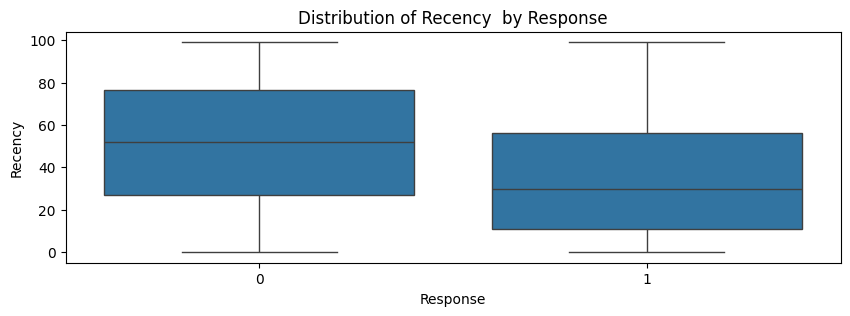

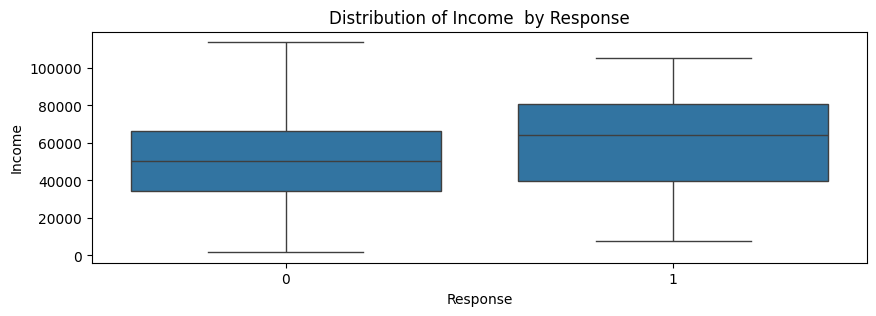

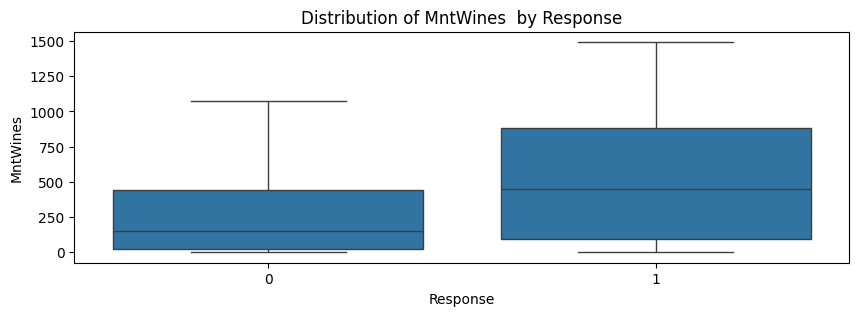

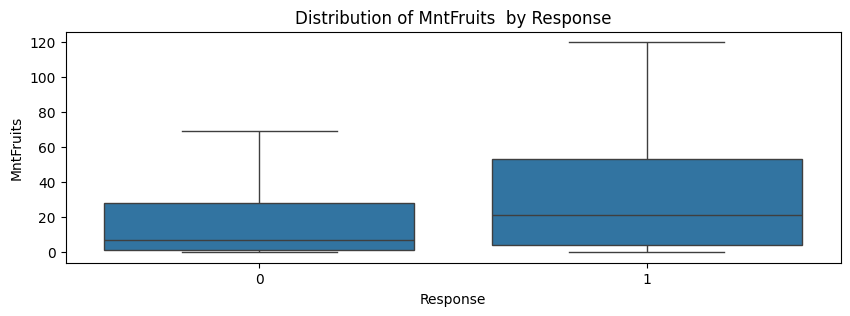

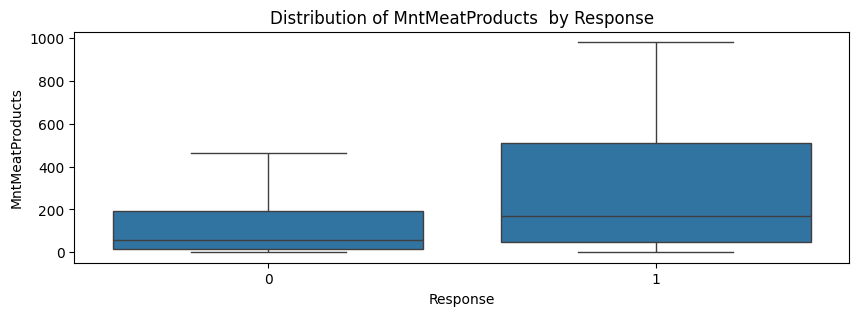

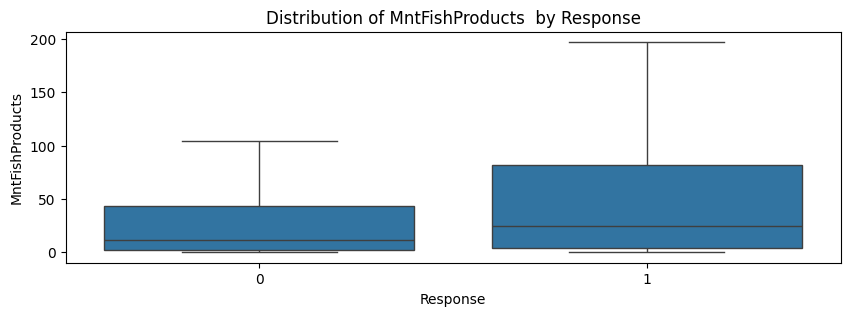

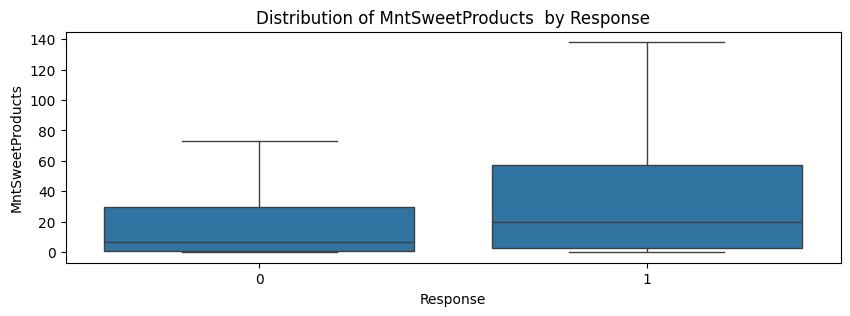

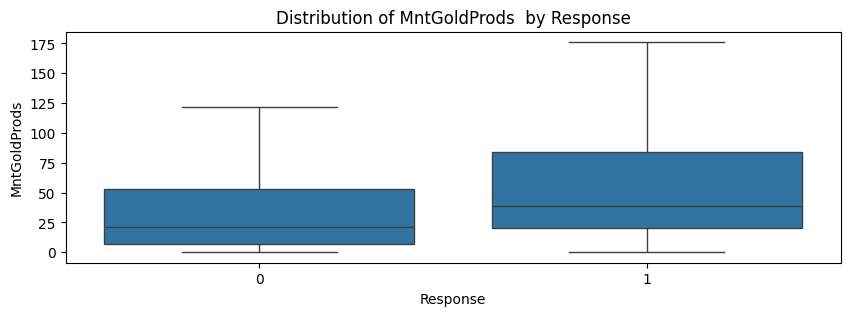

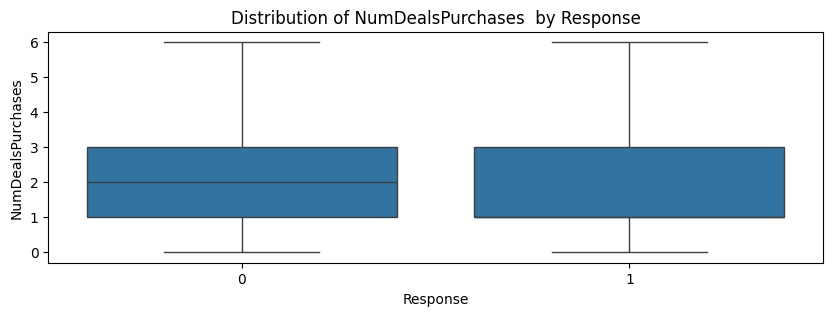

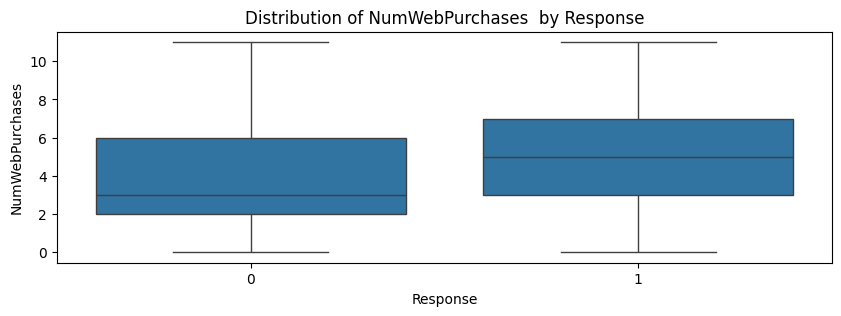

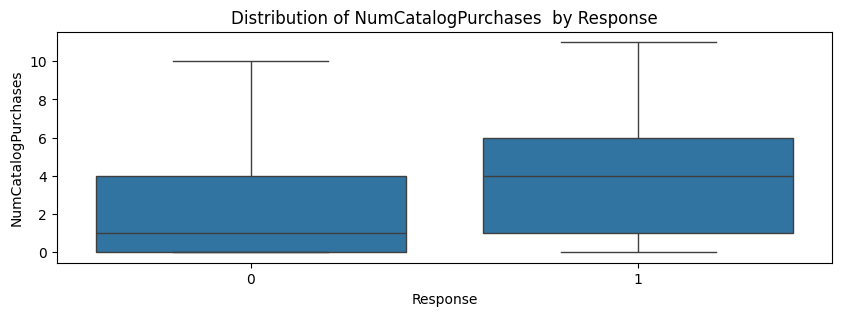

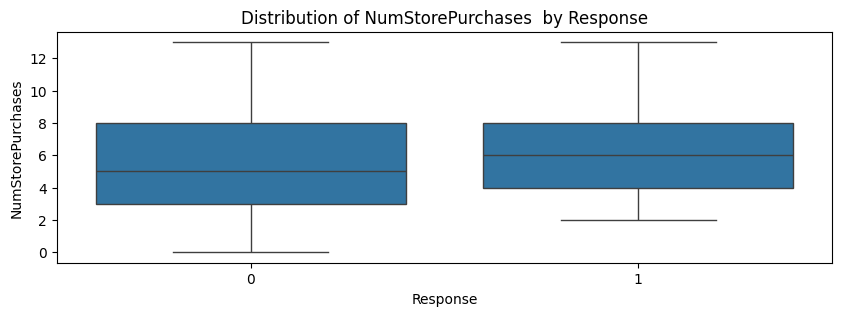

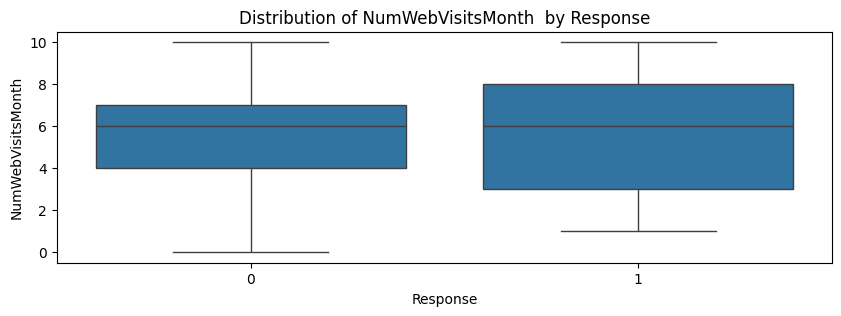

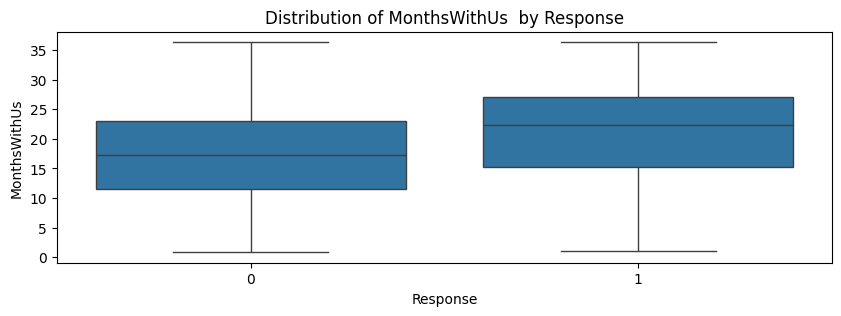

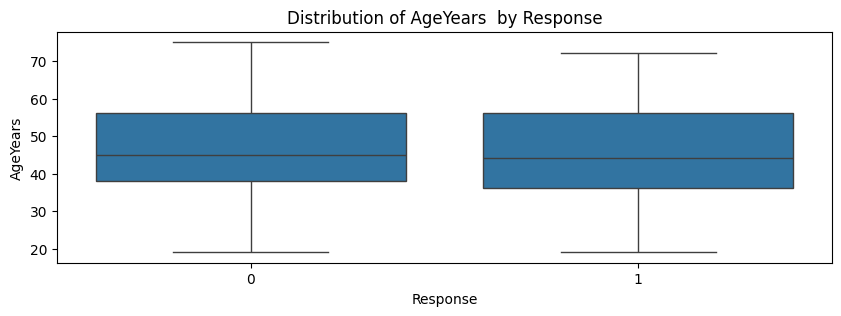

In [26]:
for factor in quantitativefactorsToExplore:
  plt.figure(figsize=(10, 3))
  sns.boxplot(x='Response', y=factor, data=SuperStore, showfliers=False)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by Response')
  plt.show()

### Impact of qualitative factors on the response.

In [27]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [28]:
qualitativeFactorstoExplore=['Education', 'Marital_Status', 'Kidhome',
       'Teenhome','Complain']

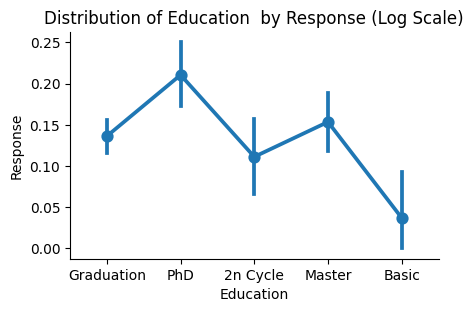

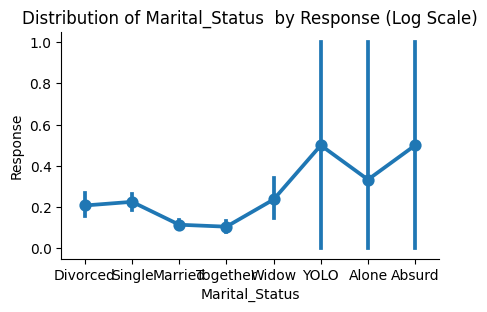

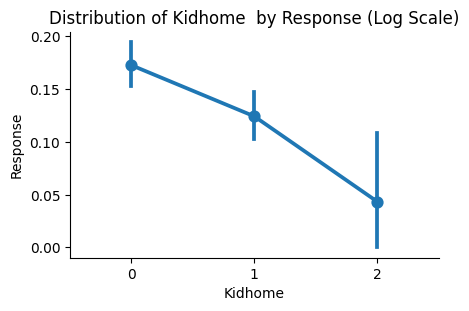

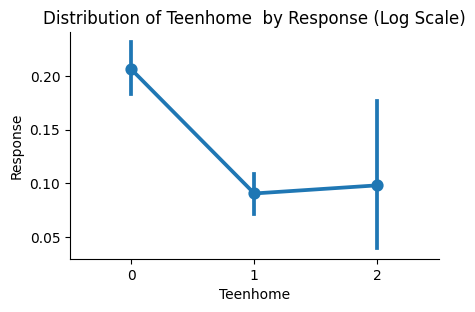

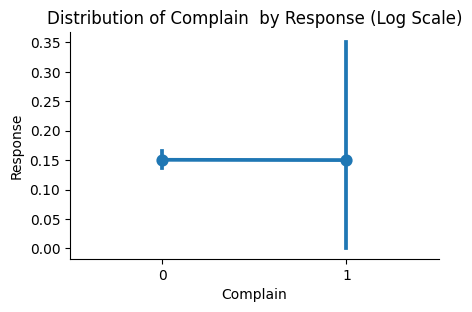

In [29]:
for factor in qualitativeFactorstoExplore:

  sns.catplot(data=SuperStore, x=factor, y="Response", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by Response (Log Scale)')
  plt.show()



From the previous Analyses we conclude that some factors, both qualitative and quantitative, seem to have an impact of the reponse (propensity of the customer to accept the offer)

In [30]:
qualitativeFactorstoExplore

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']

In [31]:
corr=SuperStore.drop(qualitativeFactorstoExplore,axis=1).corr()

<Axes: >

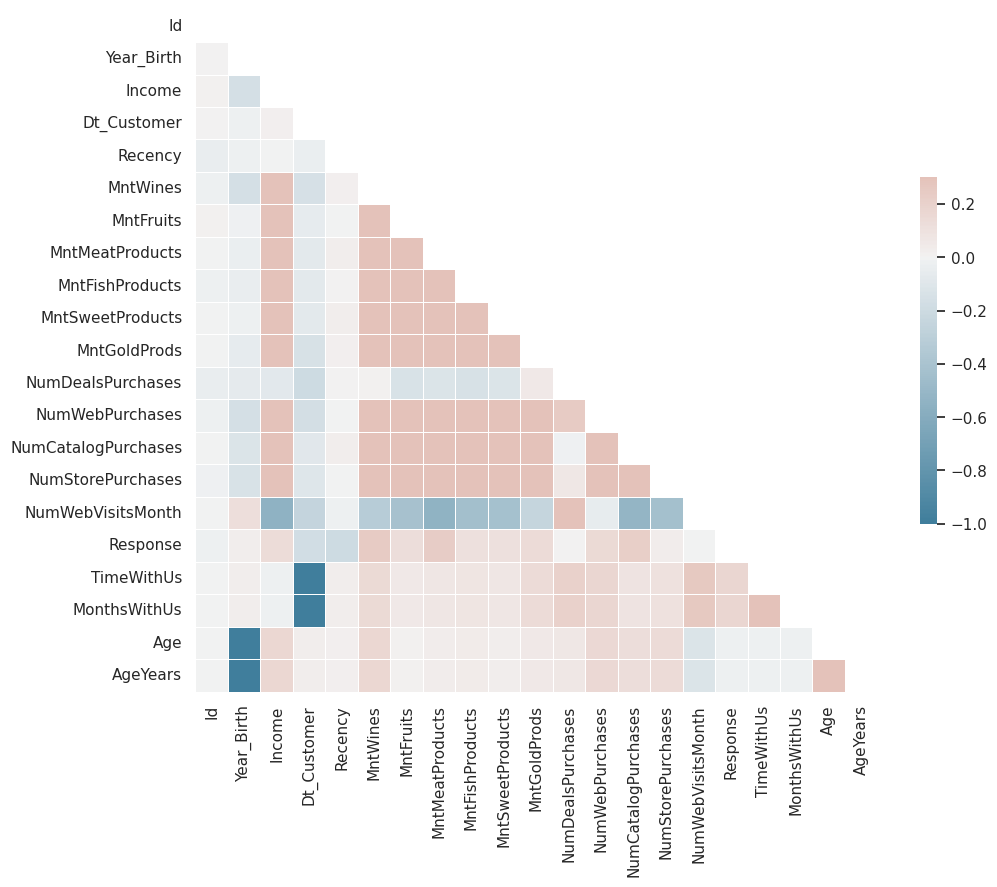

In [32]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. What drives customers' propensity to accept the offer ?
### We want to explore the impact of each factor on the response.
#### Given that the response is binary (Accept/Reject) we fit a Decision Tree classifier.

## 6. First Model (Decision Tree Classifier)


#### From the EDA we conclude that most of the features have an impact on the response (customer accepting the offer)



In [33]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [34]:
Features=['Education','Income','Kidhome','Teenhome','MntWines','MntGoldProds','MonthsWithUs','AgeYears']

In [35]:
y=SuperStore['Response']
X=SuperStore[Features]

In [36]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
categorical_features

Index(['Education'], dtype='object')

### 6.1 Encoding of categorical features

Our Dataset has categorical features
 We nee to code them before fitting any model

In [37]:
from sklearn.preprocessing import OrdinalEncoder
# Create an OrdinalEncoder
enc = OrdinalEncoder()

# Fit and transform the categorical features
X[categorical_features] = enc.fit_transform(X[categorical_features])
X

,Education,Income,Kidhome,Teenhome,MntWines,MntGoldProds,MonthsWithUs,AgeYears
0,2.0,84835.0,0,0,189,218,6.633333,45.030137
1,2.0,57091.0,0,0,464,37,6.666667,54.035616
2,2.0,67267.0,0,1,134,30,7.766667,57.038356
3,2.0,32474.0,1,1,10,0,1.900000,48.032877
4,2.0,21474.0,1,0,6,34,5.000000,26.016438
...,...,...,...,...,...,...,...,...
2235,4.0,66476.0,0,1,372,78,18.233333,39.027397
2236,0.0,31056.0,1,0,5,16,23.633333,38.024658
2237,2.0,46310.0,1,0,185,14,34.166667,39.027397
2238,2.0,65819.0,0,0,267,63,25.433333,37.024658


### 6.2. Dataset Split

In [51]:
from sklearn.model_selection import train_test_split
# split data into training and test data, for both features and target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
X_train.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntGoldProds,MonthsWithUs,AgeYears
2109,3.0,83151.0,0,0,407,18,27.100000,55.038356
358,4.0,42769.0,0,1,71,0,12.900000,53.035616
1956,3.0,46098.0,1,1,57,36,28.866667,40.027397
2000,2.0,36807.0,1,1,4,5,24.733333,61.041096
646,2.0,30015.0,1,0,25,5,11.100000,45.030137


In [53]:
y_train.head()

,Response
2109,0
358,0
1956,0
2000,0
646,0


In [54]:
# prompt: count different values in train_y

print(y_train.value_counts())

Response
0    1404
1     255
Name: count, dtype: int64


### 6.3 Let's train a Decision Tree classifier


In [55]:




from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [56]:
X.loc[0]

,0
Education,2.000000
Income,84835.000000
Kidhome,0.000000
Teenhome,0.000000
MntWines,189.000000
MntGoldProds,218.000000
MonthsWithUs,6.633333
AgeYears,45.030137


In [57]:
tree_clf.predict([X.loc[0]])

array([0])


### 6.4. Measuring Accuracy Using Confusion Matrices

#### A good way to evaluate classifiers model is through confusion matrices.

#### The general idea of a confusion matrix is to count the number of times instances of class A are classified as class B, for all A/B pairs.

In [58]:
# Make predictions on the test set
y_test_predicted = tree_clf.predict(X_test)

In [59]:
from sklearn import metrics
print(
    f"Classification report for classifier {tree_clf}:\n"
    f"{metrics.classification_report(y_test, y_test_predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(max_depth=2):
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       476
           1       0.54      0.17      0.25        78

    accuracy                           0.86       554
   macro avg       0.71      0.57      0.59       554
weighted avg       0.83      0.86      0.83       554




Confusion matrix:
[[465  11]
 [ 65  13]]


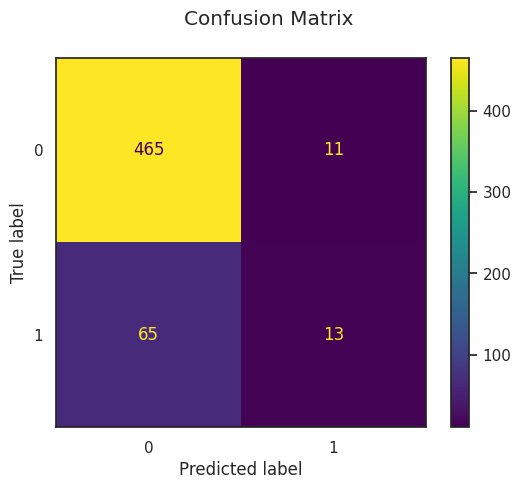

In [60]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

####Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

#### A perfect classifier would only have true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

### Based on the previous figure we conclude that our binary classifier is not quite good as it has lots of values outside the diagonal. Lots of false negatives (bottom-left cell): customers incorrectly predicted as negative yet they actually did


### 6.5. Measuring Accuracy Using ROC curves

#### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate against the false positive rate (FPR).


In [63]:
y_test.values

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [64]:
from sklearn.metrics import RocCurveDisplay, roc_curve
fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_test, y_test_predicted)

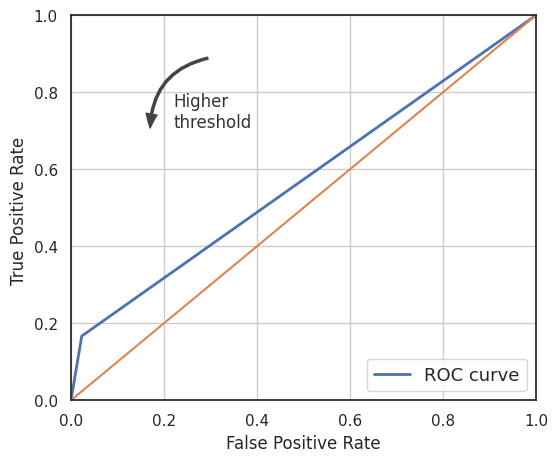

In [65]:
import matplotlib.patches as patches # import the patches module
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="ROC curve")



plt.gca().add_patch(patches.FancyArrowPatch(
    (0.30, 0.89), (0.17, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.22, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1],label="Random Classifier")


plt.show()

## 7. Second Model (Binary Classifier:Decision Tree)

### Let's try to improve the performance of our classifier

In [81]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4)

### 7.1. Measuring Accuracy Using Confusion Matrices

In [82]:
# Make predictions on the test set
y_test_predicted = tree_clf.predict(X_test)

Confusion matrix:
[[450  26]
 [ 60  18]]


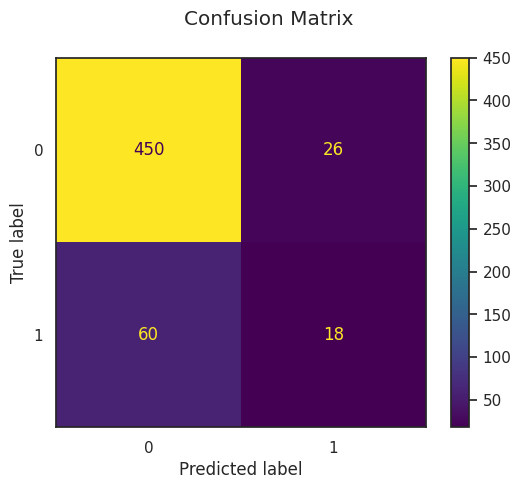

In [83]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()